# Notebook for coverage plot optimization

- We want to generate coverage plots from Signac, but with our own style.

More specific goals are below:
- Use/Modify Signac's default functions to create customized coverage plots for different peak-calling algorithms (This will be used for the peak-calling method SI figure)

In [1]:
library(Seurat)
library(Signac)
library(patchwork)
library(ggplot2)


Attaching SeuratObject



In [42]:
# Load the plotting module
source("/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/zebrahub-multiome-analysis/scripts/utils/module_coverage_plot_viz.R")

In [2]:
# import the Seurat object (TDR118, 15-somites stage)
TDR118 <- readRDS("/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/01_Signac_processed/TDR118reseq/TDR118_processed.RDS")
TDR118

An object of class Seurat 
1573599 features across 13614 samples within 7 assays 
Active assay: peaks_merged (485357 features, 485357 variable features)
 6 other assays present: RNA, ATAC, SCT, peaks_bulk, peaks_celltype, Gene.Activity
 5 dimensional reductions calculated: pca, umap.rna, lsi, umap.atac, umap.joint

In [10]:
TDR118@assays$ATAC@fragments[[1]]@path

[1] "/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/TDR118reseq/outs/atac_fragments.tsv.gz"

In [23]:
# Making sure that the Fragment files' location match as the one in the Seurat object
# Update the filepath for the "Fragment" object within the Seurat object
# NOTE that we need to update it manually for every assay
TDR118@assays$ATAC@fragments[[1]]@path <- "/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/00_CRG_arc_processed/TDR118reseq/outs/atac_fragments.tsv.gz"
TDR118@assays$peaks_celltype@fragments[[1]]@path <- "/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/00_CRG_arc_processed/TDR118reseq/outs/atac_fragments.tsv.gz"
TDR118@assays$peaks_bulk@fragments[[1]]@path <- "/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/00_CRG_arc_processed/TDR118reseq/outs/atac_fragments.tsv.gz"
TDR118@assays$peaks_merged@fragments[[1]]@path <- "/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/00_CRG_arc_processed/TDR118reseq/outs/atac_fragments.tsv.gz"

Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”


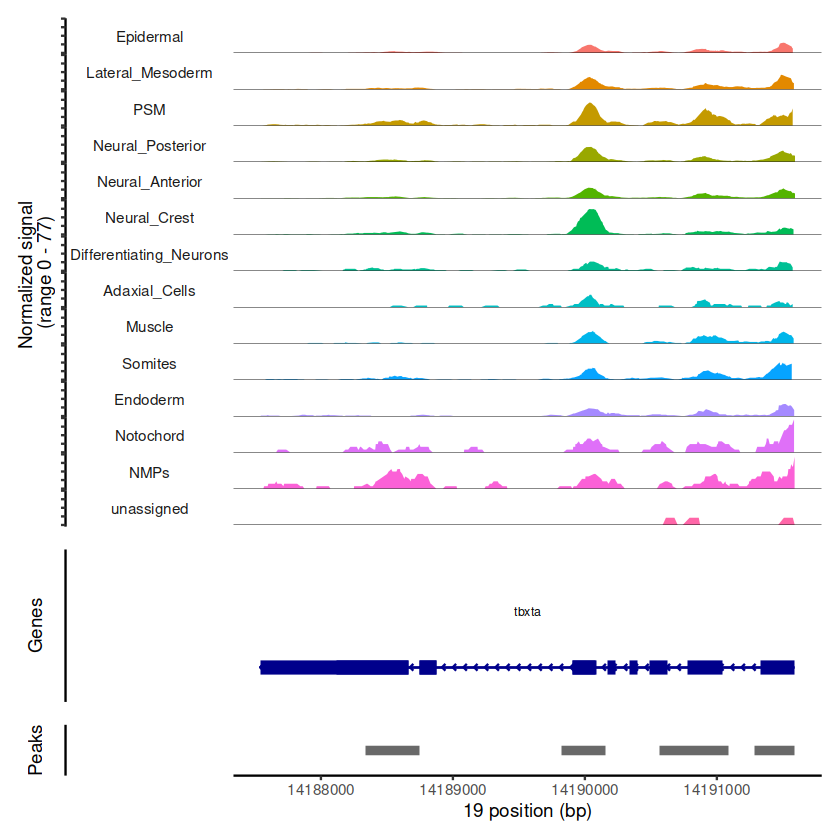

In [24]:
CoveragePlot(TDR118, region="tbxta")

Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”


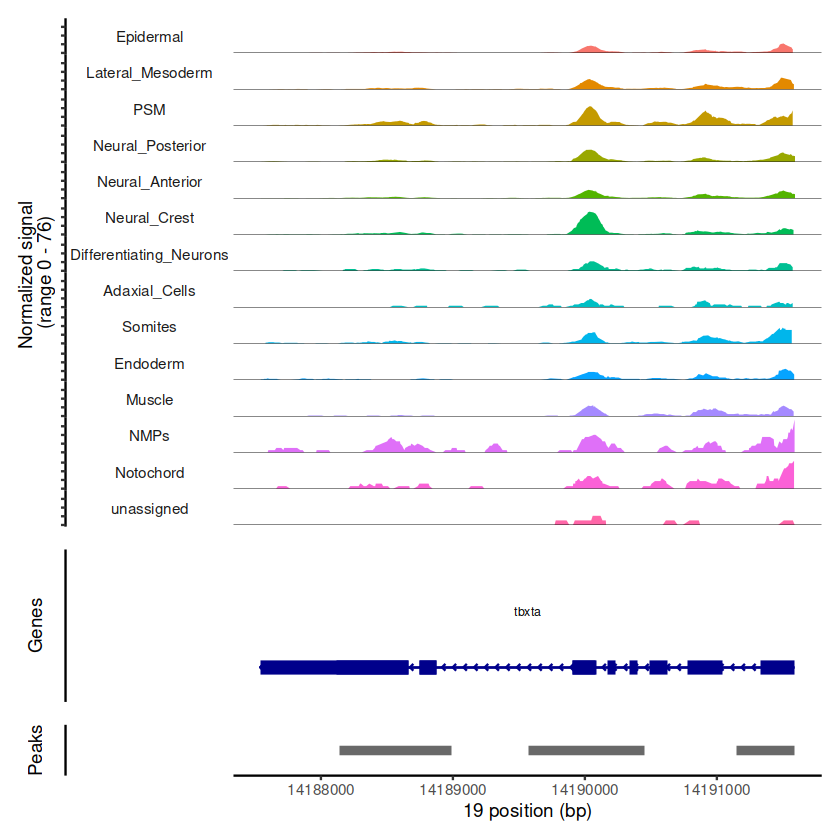

In [22]:
CoveragePlot(multiome, region="tbxta")

### Note that there are four types of peak profiles

- ATAC: peaks called by Cellranger-arc
- peaks_bulk: peaks called by MACS2 (Signac) for all cells
- peaks_celltype: peaks called by MACS2 (Signac) for each celltype (pseudo-bulk)
- peaks_merged: all three peaks merged by itrative overlap strategy (illustrated in ArchR: https://www.archrproject.com/bookdown/the-iterative-overlap-peak-merging-procedure.html). Here, peaks_celltype > peaks_bulk > ATAC order of significance.

Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”


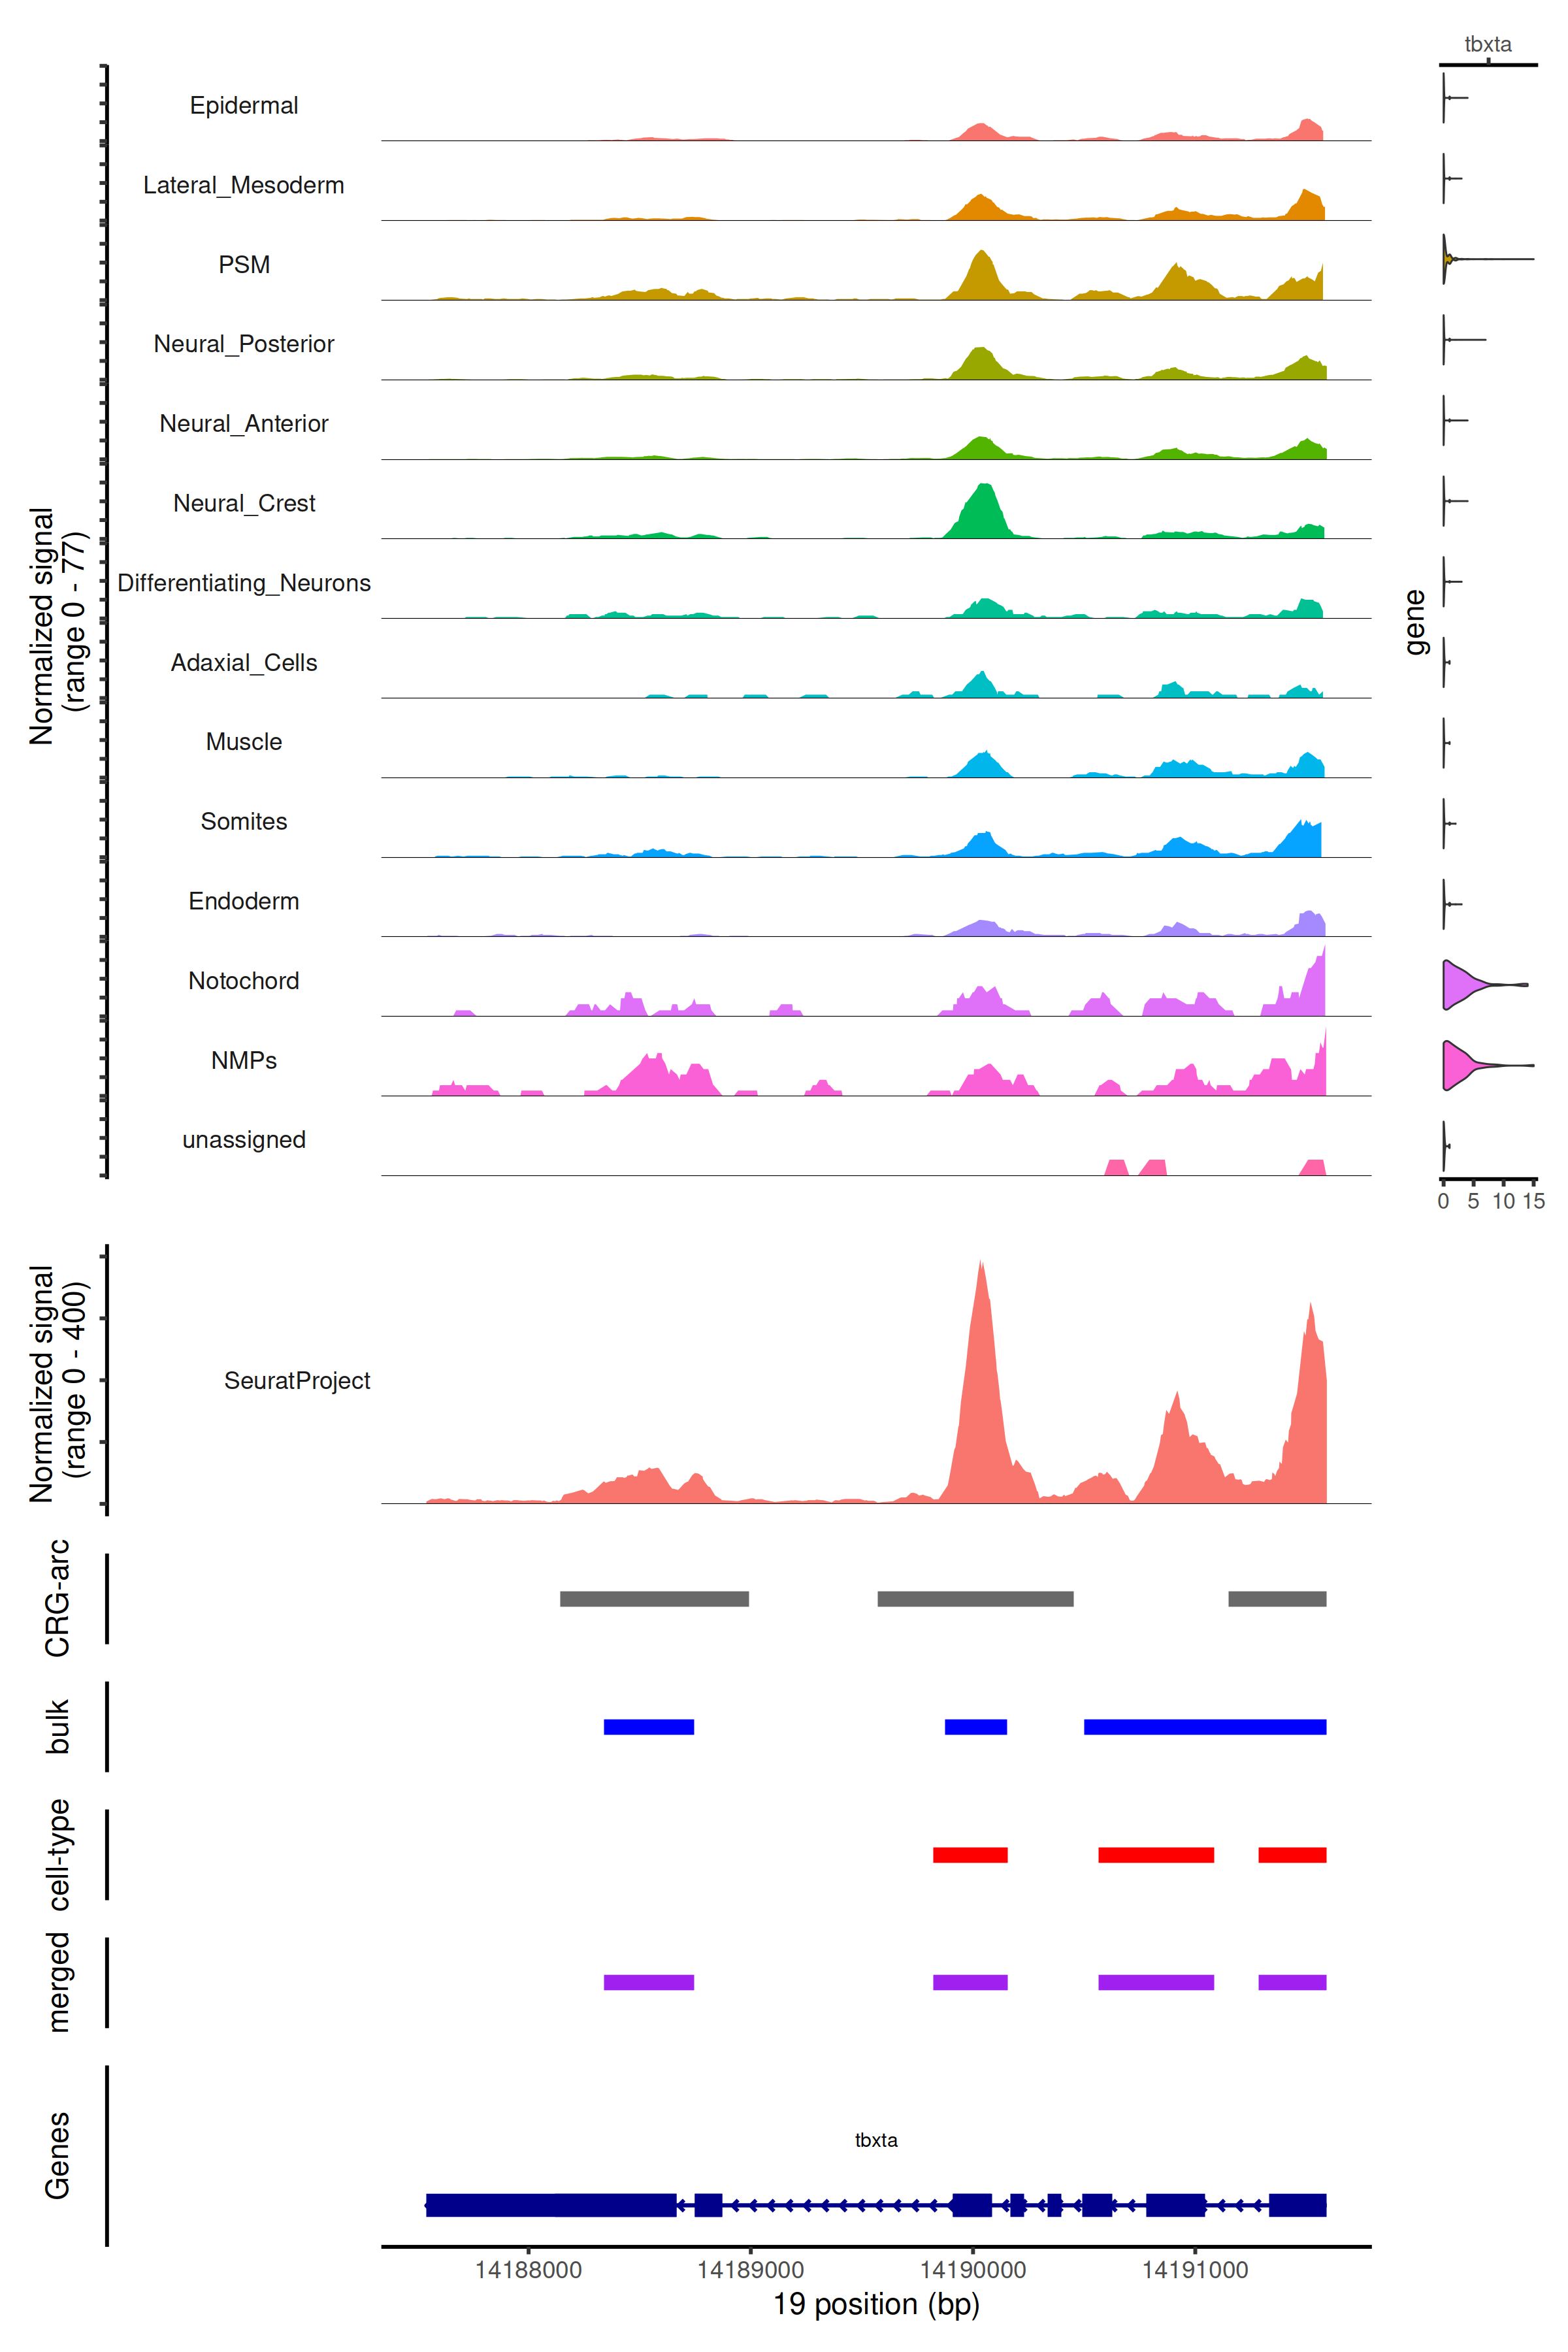

In [39]:
figpath = "/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/zebrahub-multiome-analysis/figures/peak_calling_benchmark/"
coverage_plot(TDR118, gene = "tbxta", 
              filepath = figpath)

In [45]:
figpath = "/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/zebrahub-multiome-analysis/figures/peak_calling_benchmark/"
figpath

[1] "/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/zebrahub-multiome-analysis/figures/peak_calling_benchmark/"

## generation of coverage plots for a list of genes

In [46]:
# Use the functions defined in the module (module_coverage_plot_viz.R)
# list_genes <- list("lrrc17","comp","ripply1","rx1","vsx2","tbx16","myf5","cdx4",
#                  "hes6","crestin","ednrab","dlx2a","cldni","cfl1l",
#                   "fezf1","sox1b","foxg1a","olig3","hoxd4a","rxrga",
#                   "gata5","myh7","tnnt2a",'pkd1b',"scg3","etv5a","pitx3",
#                   "elavl3","stmn1b","sncb","myog","myl1","jam2a",
#                   "prrx1","nid1b","cpox","gata1a","hbbe1","unc45b","ttn1",
#                   "apobec2a","foxi3b","atp1b1b","fli1b","kdrl","anxa4",
#                   "cldnc","cldn15a","tbx3b","loxl5b","emilin3a","sema3aa","irx7","vegfaa",
#                   "ppl","krt17","icn2","osr1","hand2","shha","shhb","foxa2",
#                   "cebpa","spi1b","myb","ctslb","surf4l","sec61a1l","mcf2lb",
#                   "bricd5","etnk1","chd17","acy3","meis1a","en2a","pax6a")
list_genes <- list("tbx16","myf5","cdx4","hes6","gata5","myh7",
                   "tnnt2a",'pkd1b',"scg3","etv5a","pitx3",
                   "gata1a","hbbe1","irx7","meis1a",
                   "en2a","pax6a","rarga","noto","rps18")
make_coverage_plots(TDR118, list_genes, output_path = figpath)

Gene hbbe1 not found in GTF file. Skipping.


Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 1 rows contain

NULL


Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 9 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”


png 
  2

In [6]:
# import the cicero connections
cicero_connections <- read.csv("/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/TDR118_cicero_output/02_TDR118_cicero_connections_CRG_arc_peaks.csv")
head(cicero_connections)

ERROR: Error in cicero_connections.head(): could not find function "cicero_connections.head"


In [34]:
sorted_cicero_connections <- cicero_connections[order(cicero_connections$coaccess, decreasing = FALSE), ]
head(sorted_cicero_connections)

,X,Peak1,Peak2,coaccess
,<int>,<chr>,<chr>,<dbl>
24925716,25080832,24-17160375-17161077,24-17168001-17168928,-0.6733118
24926413,25081532,24-17168001-17168928,24-17160375-17161077,-0.6733118
23966202,24115462,23-32198630-32199562,23-32499634-32500463,-0.6653330
23981455,24130795,23-32499634-32500463,23-32198630-32199562,-0.6653330
11469579,11541064,16-33484518-33485430,16-33655530-33656446,-0.6588027
11481776,11553317,16-33655530-33656446,16-33484518-33485430,-0.6588027


In [33]:
sorted_cicero_connections[sorted_cicero_connections$coaccess < -0.6, ]

,X,Peak1,Peak2,coaccess
,<int>,<chr>,<chr>,<dbl>
24925716,25080832,24-17160375-17161077,24-17168001-17168928,0.6
24926413,25081532,24-17168001-17168928,24-17160375-17161077,0.6
23966202,24115462,23-32198630-32199562,23-32499634-32500463,0.6
23981455,24130795,23-32499634-32500463,23-32198630-32199562,0.6
11469579,11541064,16-33484518-33485430,16-33655530-33656446,0.6
11481776,11553317,16-33655530-33656446,16-33484518-33485430,0.6
9401208,9459959,15-18093330-18094179,15-18340493-18341391,0.6
9414604,9473431,15-18340493-18341391,15-18093330-18094179,0.6
11470495,11541984,16-33494279-33495177,16-33655530-33656446,0.6


In [18]:
library(cicero)

Loading required package: monocle3

Loading required package: Biobase

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.


Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading requi

In [ ]:
ccans <- generate_ccans(cicero_connections)b

In [22]:
region <- sorted_cicero_connections[1, ]$Peak1
region

# # Input string
# input_string <- '24-17160375-17161077'

[1] "24-17160375-17161077"

Warning message:
"Removed 1 rows containing missing values (`geom_segment()`)."


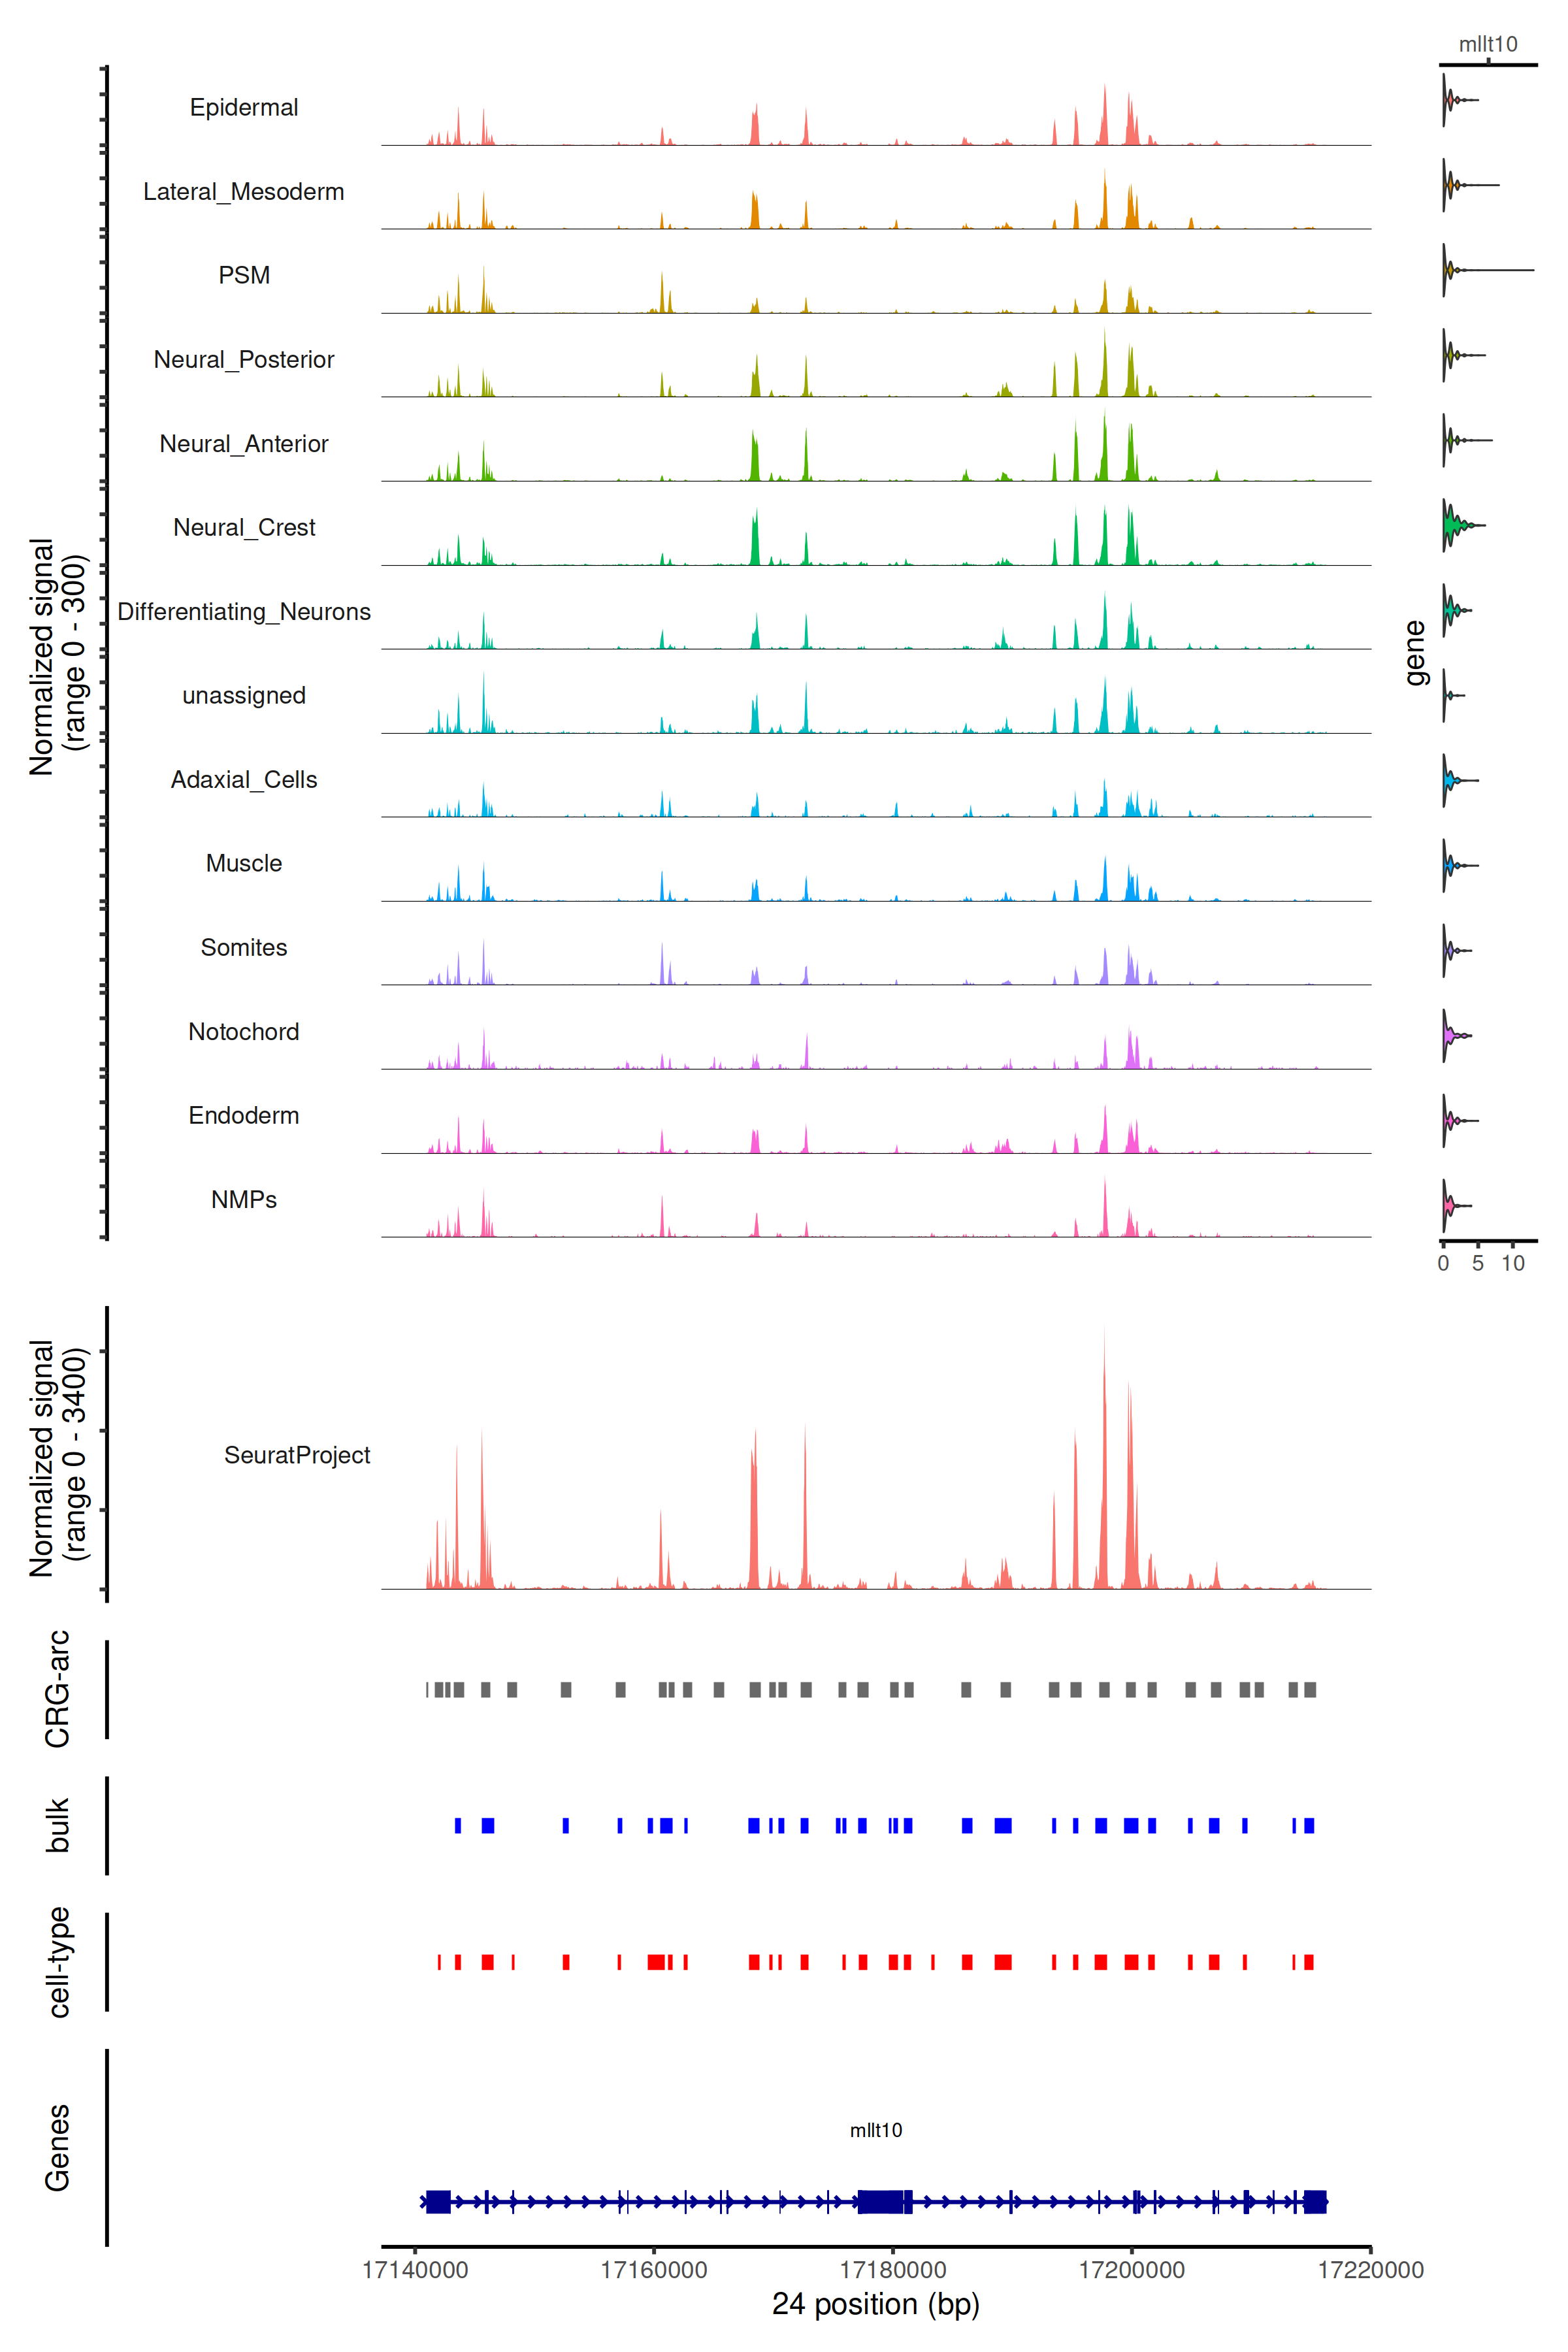

In [27]:
plot <- generate_coverage_plots(TDR118, "mllt10")
plot